In [2]:
from minisom import MiniSom

In [3]:
from PIL import Image
import numpy as np
from Unet_Application_to_Saturn_Kilometric_Radiation.Scripts.read_config import config 
from Unet_Application_to_Saturn_Kilometric_Radiation.Scripts.train_model import load_ids
from utils import DataGen, Colors
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px 
import the_forest_palette
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [4]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 384
TRAIN_PATH = os.path.join(config.output_data_fp, 'train')

total_ids = load_ids(TRAIN_PATH, 3000)

Loaded 1533 IDs from c:\Code\Image_dimension_reduction\data\output_data\train


In [5]:
datagen = DataGen(total_ids, TRAIN_PATH, len(total_ids), IMAGE_WIDTH, IMAGE_HEIGHT)
data, labels = datagen.__getitem__(0) 

In [8]:
# Initialize SOM
som = MiniSom(x=10, y=10, input_len=data.shape[1], sigma=1.0, learning_rate=0.5)
# Initialize weights
som.random_weights_init(data)
# Train the SOM
som.train_batch(data, 100)


In [9]:
color_dict = Colors().get_colors()
colors = list(color_dict.values())
color_map = {label: colors[i] for i, label in enumerate(np.unique(labels))}
# Convert labels to corresponding colors
colors = [color_map[label] for label in labels]

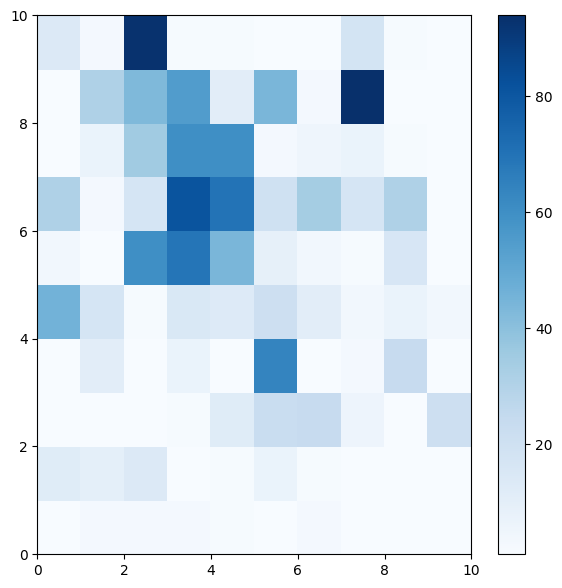

In [12]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

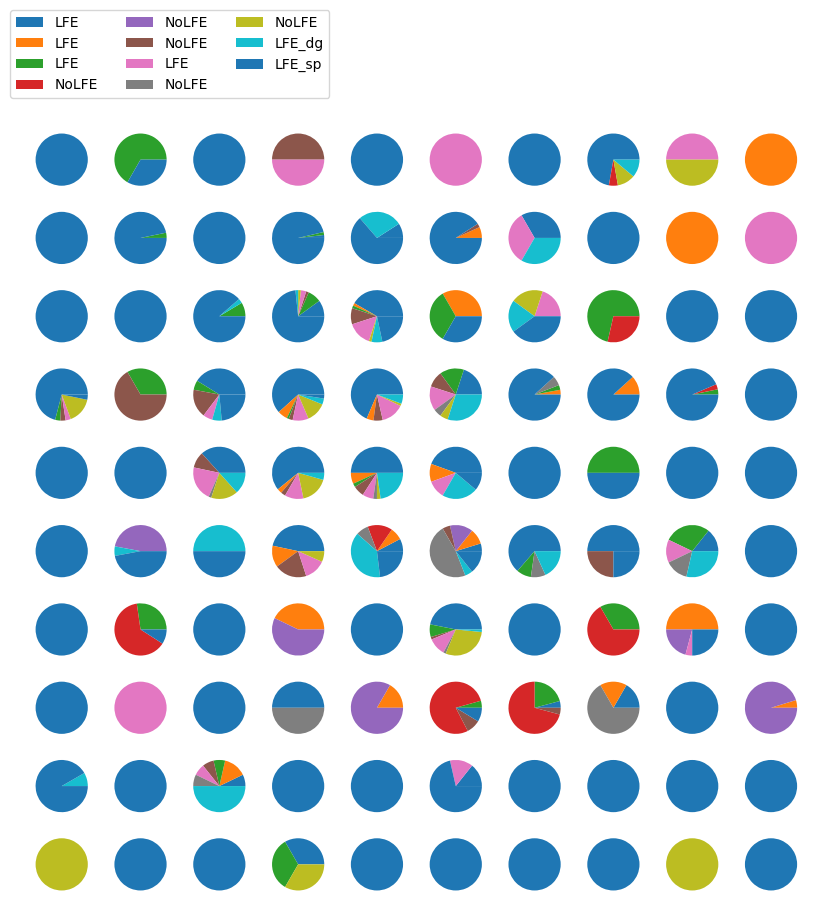

In [13]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 10))
the_grid = gridspec.GridSpec(10, 10, fig)
labels_map = som.labels_map(data, labels)

for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in np.unique(labels)]
    plt.subplot(the_grid[10-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, labels, bbox_to_anchor=(3.5, 6.5), ncol=3)
#plt.savefig('resulting_images/som_seed_pies.png')
plt.show()